# Configuration

## Imports

In [18]:
import pandas as pd
import glob
import os
import gc
from pyspark.sql import SparkSession
from tkinter import Tk     
from tkinter.filedialog import askopenfilename,askdirectory
import pyspark.sql.functions as F 
import matplotlib.pyplot as plt


## Spark Configuration

In [2]:
spark = SparkSession \
    .builder \
    .appName("Data_Forecasting") \
    .config("spark.memory.offHeap.enabled","true") \
    .config("spark.driver.cores","4") \
    .config("spark.driver.maxResultSize","4g") \
    .config("spark.memory.offHeap.size","4g") \
    .config("spark.driver.memory", "4g")\
    .config("spark.executor.memory","4g")\
    .getOrCreate()

23/07/06 15:37:02 WARN Utils: Your hostname, nuno-g14 resolves to a loopback address: 127.0.1.1; using 192.168.1.103 instead (on interface wlp2s0)
23/07/06 15:37:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/07/06 15:37:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/07/06 15:37:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/07/06 15:37:03 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [6]:
Tk().withdraw()

path = askdirectory()
        
li = []
files = os.path.join(path, "*.feather")
files = glob.glob(files)

for filename in files:
    dataframe = pd.read_feather(filename)
    dataframe = spark.createDataFrame(dataframe)
    li.append(dataframe)
            
df0 = li[0]

for df in li:
    if df0 != df:
        df0 = df0.join(df,["date"], "outer")


dataframe = df0
        

/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarni

In [7]:
dataframe.show(5)

+-------------------+---------------------+--------------------------+-------------+------------------+---------------+--------------------+----------------------------+---------------------------------+-----------------+----------------------+---------------+--------------------+----------------+---------------------+----------------------+---------------------------+----------------+---------------------+---------------------+--------------------------+------------------+-----------------------+------------+-----------------+--------------------+-------------------------+----------------+---------------------+---------------+--------------------+-------------------+------------------------+--------------+-------------------+---------------------+--------------------------+----------------+---------------------+
|               date|Portugal_shopping_map|Portugal_shopping_map_norm|Portugal_food|Portugal_food_norm|Portugal_subway|Portugal_subway_norm|Portugal_tourist_attractions|Portug

In [8]:
dataframe.summary().show()

+-------+---------------------+--------------------------+------------------+------------------+------------------+--------------------+----------------------------+---------------------------------+-----------------+----------------------+------------------+--------------------+------------------+---------------------+----------------------+---------------------------+------------------+---------------------+---------------------+--------------------------+------------------+-----------------------+------------------+------------------+--------------------+-------------------------+-----------------+---------------------+------------------+--------------------+-------------------+------------------------+-----------------+-------------------+---------------------+--------------------------+------------------+---------------------+
|summary|Portugal_shopping_map|Portugal_shopping_map_norm|     Portugal_food|Portugal_food_norm|   Portugal_subway|Portugal_subway_norm|Portugal_tourist_att

In [14]:
reviews_count = dataframe.count()

for cl in dataframe.columns:
    if cl != 'date':
        k = dataframe.select(cl).filter(F.col(cl).isNull() | F.isnan(cl)).count()
        print(f'Column {cl} with {k} nulls or NaN, out of {reviews_count} records ({k*100/reviews_count:.2f}%)')

Column Portugal_shopping_map with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_shopping_map_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_food with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_food_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_subway with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_subway_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_tourist_attractions with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_tourist_attractions_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_shopping with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_shopping_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_travel with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_travel_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_tickets with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_tickets_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_hotel_booking with 365 nulls or NaN, out of 1826 records (19.99%)


Column Portugal_hotel_booking_norm with 365 nulls or NaN, out of 1826 records (19.99%)


Column Portugal_weather with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_weather_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_accomodation with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_accomodation_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_specialty with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_specialty_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_map with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_map_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_attractions with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_attractions_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_flights with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_flights_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_hotels with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_hotels_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_travel_map with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_travel_map_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_snack with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_snack_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_travel_guide with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_travel_guide_norm with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_airport with 0 nulls or NaN, out of 1826 records (0.00%)


Column Portugal_airport_norm with 0 nulls or NaN, out of 1826 records (0.00%)


In [29]:
no_visible_pattern = [
'Portugal_food_norm',
'Portugal_subway_norm',
'Portugal_tourist_attractions_norm',
'Portugal_shopping_norm',
'Portugal_hotel_booking_norm',
'Portugal_weather_norm',
'Portugal_map_norm',
'Portugal_snack_norm'
]

lot_of_missing_values = [
'Portugal_shopping_map_norm',
'Portugal_tickets_norm',
'Portugal_hotel_booking_norm',
'Portugal_accomodation_norm',
'Portugal_specialty_norm',
'Portugal_attractions_norm',
'Portugal_travel_map_norm',
'Portugal_travel_guide_norm'
]

for cl in dataframe.columns:
    if cl != 'date':
        if not cl.endswith('_norm') or cl in lot_of_missing_values or cl in no_visible_pattern:
            dataframe = dataframe.drop(cl)

In [30]:
dataframe.summary().show()

+-------+--------------------+---------------------+--------------------+---------------------+
|summary|Portugal_travel_norm|Portugal_flights_norm|Portugal_hotels_norm|Portugal_airport_norm|
+-------+--------------------+---------------------+--------------------+---------------------+
|  count|                1826|                 1826|                1826|                 1826|
|   mean|  62.640509309967136|   62.401801752464415|   61.92867469879513|   63.358773274917816|
| stddev|  12.209355358126379|   15.688878541903307|  13.778516575079403|   13.485996167554962|
|    min|                29.0|                 22.0|                24.0|                 25.0|
|    25%|               54.82|                50.35|               53.14|                53.86|
|    50%|               63.75|                60.79|               64.89|                64.07|
|    75%|               71.15|                 74.8|               71.69|                73.69|
|    max|               100.0|          

In [31]:
dataframe.show(5)

+-------------------+--------------------+---------------------+--------------------+---------------------+
|               date|Portugal_travel_norm|Portugal_flights_norm|Portugal_hotels_norm|Portugal_airport_norm|
+-------------------+--------------------+---------------------+--------------------+---------------------+
|2015-01-01 00:00:00|               56.95|                50.56|               57.82|                 51.2|
|2015-01-02 00:00:00|                59.2|                51.62|                50.0|                 53.2|
|2015-01-03 00:00:00|               56.65|                48.29|               60.42|                 53.8|
|2015-01-04 00:00:00|               60.85|                51.16|               63.74|                 51.0|
|2015-01-05 00:00:00|                56.5|                48.14|               56.63|                 56.8|
+-------------------+--------------------+---------------------+--------------------+---------------------+
only showing top 5 rows



/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


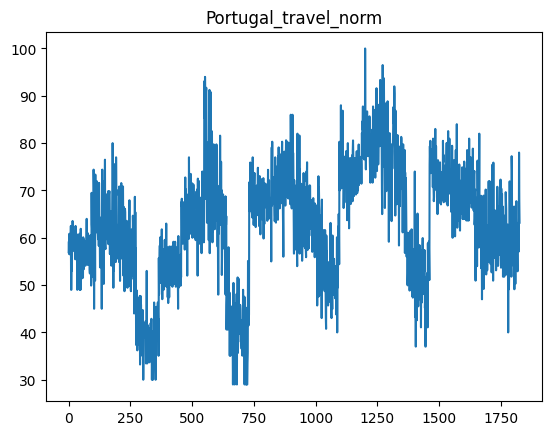

/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


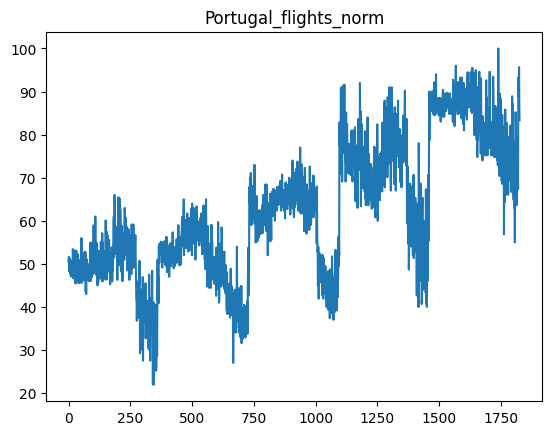

/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


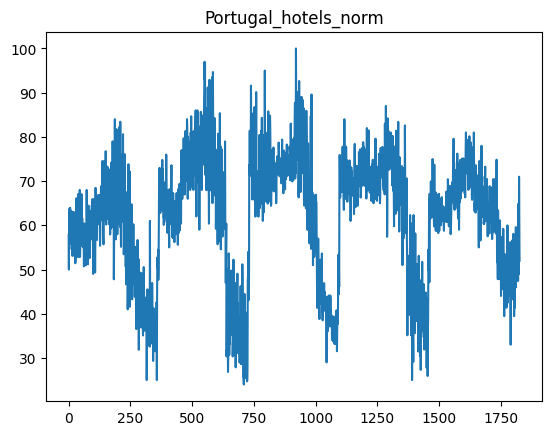

/home/nuno/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


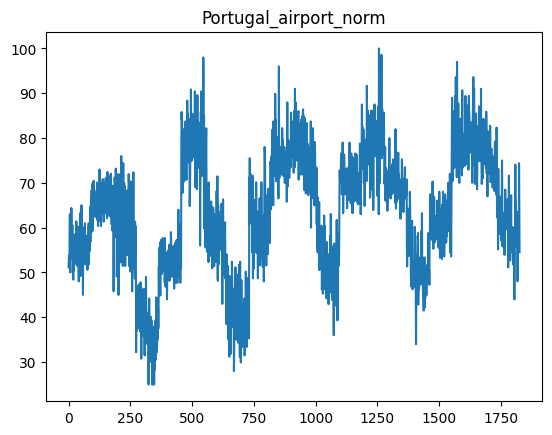

In [28]:
for cl in dataframe.columns:
    if cl != 'date':
        timeseries = dataframe.toPandas()[[cl]].values.astype('float32')
        plt.plot(timeseries)
        plt.title(cl)
        plt.show()

In [32]:
write_path = input("Name of the new parquet file (no need to input .parquet):")
dataframe.write.parquet("../MSc_Model_Datasets/" + write_path + ".parquet")

Name of the new parquet file (no need to input .parquet): GoogleTrendsPortugal
